In [404]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

# Step 1: Data Analysis

### 1a. Look at it

In [405]:
A_data = pd.read_csv("data/Dataset_A.csv").to_numpy().T   # Transposed to be 2 columns rather than 2 rows
B_data = pd.read_csv("data/Dataset_B.csv").to_numpy().T
C_data = pd.read_csv("data/Dataset_C.csv").to_numpy().T

A_t, A_ft = A_data[0], A_data[1]
B_t, B_ft = B_data[0], B_data[1]
C_t, C_ft = C_data[0], C_data[1]

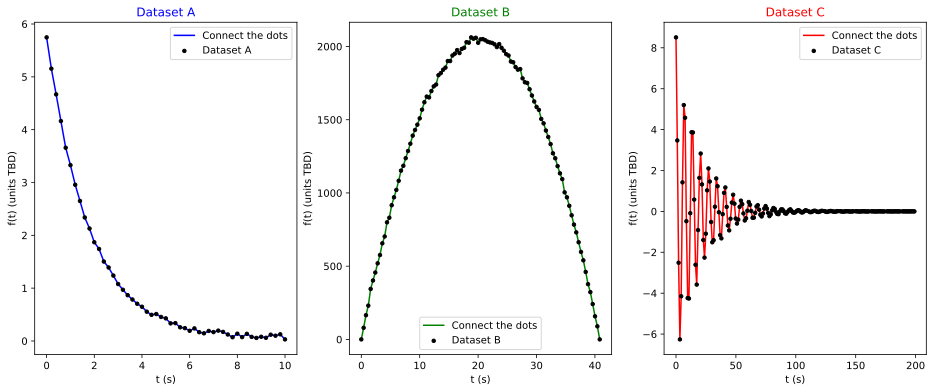

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(16,6))
A_color = 'blue'
B_color = 'green'
C_color = 'red'

ax[0].plot(A_t, A_ft, color=A_color, label = "Connect the dots", zorder=1)
ax[0].scatter(A_t, A_ft, s = 12, color='black', label = "Dataset A", zorder=2)
ax[0].set_title("Dataset A", color=A_color)
ax[0].set_xlabel(r"t (s)")
ax[0].set_ylabel(r"f(t) (units TBD)")
ax[0].legend()

ax[1].plot(B_t, B_ft, color=B_color, label = "Connect the dots", zorder=1)
ax[1].scatter(B_t, B_ft, s = 12, color='black', label = "Dataset B", zorder=2)
ax[1].set_title("Dataset B", color=B_color)
ax[1].set_xlabel(r"t (s)")
ax[1].set_ylabel(r"f(t) (units TBD)")
ax[1].legend()

ax[2].plot(C_t, C_ft, color=C_color, label = "Connect the dots", zorder=1)
ax[2].scatter(C_t, C_ft, s = 12, color='black', label = "Dataset C", zorder=2)
ax[2].set_title("Dataset C", color=C_color)
ax[2].set_xlabel(r"t (s)")
ax[2].set_ylabel(r"f(t) (units TBD)")
ax[2].legend()
plt.savefig("./figures/init.png", bbox_inches='tight')
plt.show()


### 1b. Define functional forms and fit to data

Dataset A seems to be an exponential decay of the form $f_A(t) = ae^{-bt} + c$. Dataset B is clearly a parabola, $f_B(t) = at^2 + bt + c$. Finally, C seems to be a damped oscillator. There are two different forms we could use for this, being $f_C(t) = e^{-at} (b\sin(ct) + d\sin(ct))$ and $f_{C2}(t) = be^{-at}\sin(ct + d)$. The parameters are in a weird order on the second one so the same letter describes the same thing for $a$, $b$, and $c$ ($d$ is obviously different), which will let us easily compare them later on.

In [ ]:
def f_A(t, a, b, c):
    ''' Exponential decay function := f_A(t) = ae^(-bt) + c.'''
    return a*np.exp(-b*t) + c

def f_B(t, a, b, c):
    ''' General form quadratic := f_B(t) = at^2 + bt + c'''
    return a*t**2 + b*t + c

def f_C(t, a, b, c, d):
    '''Damped oscillator (linear combo) := f_C(t) = ae^(-bt) (sin(ct) + cos(ct))'''
    trig_argument = c*t
    return np.exp(-a*t) * (b*np.sin(trig_argument) + d*np.cos(trig_argument) )

def f_C2(t, a, b, c, d):
    '''Damped oscillator (phase shift) f_C2(t) = ae^(-bt)sin(ct + d)'''
    return b*np.exp(-a*t) * np.sin(c*t + d)

The scipy ``curve_fit()`` returns the fitted paramsicients and the covariance matrix for whatever parameters you have. We'll look at the curve fits, and then analyze fit quality.

In [408]:
a_params, a_cov = scipy.optimize.curve_fit(f_A, A_t, A_ft)
b_params, b_cov = scipy.optimize.curve_fit(f_B, B_t, B_ft)
c_params, c_cov = scipy.optimize.curve_fit(f_C, C_t, C_ft)
c2_params, c2_cov = scipy.optimize.curve_fit(f_C2, C_t, C_ft)

C:\Users\Joseph\AppData\Local\Temp\ipykernel_31592\2442800309.py:51: RuntimeWarning: overflow encountered in exp
  return np.exp(-a*t) * (b*np.sin(trig_argument) + d*np.cos(trig_argument) )
C:\Users\Joseph\AppData\Local\Temp\ipykernel_31592\2442800309.py:71: RuntimeWarning: overflow encountered in exp
  return b*np.exp(-a*t) * np.sin(c*t + d)


In [409]:
def print_parameters(params, dataset_str):
    ''' 
    Neatly print the parameters associated with each model fit.

    Parameters
    ----------
    params_arr : NDArray (n)
        Array of fit parameters
    dataset_str : string
        Which dataset the covariance matrix is for. "A", "B", "C" or "C2"
    '''
    print(f"\nModel fit parameters for {dataset_str}:")
    print(f"Parameter a: {params[0]}")
    print(f"Parameter b: {params[1]}")
    print(f"Parameter c: {params[2]}")
    if len(params) == 4:
        print(f"Parameter d: {params[3]}")
    pass

In [410]:
print_parameters(a_params, "A")
print_parameters(b_params, "B")
print_parameters(c_params, "C")
print_parameters(c2_params, "C2")


Model fit parameters for A:
Parameter a: 5.7328807910255914
Parameter b: 0.5660777117031716
Parameter c: 0.048510450878830685

Model fit parameters for B:
Parameter a: -4.9016739868658075
Parameter b: 200.06207337108842
Parameter c: 3.9949103458311006

Model fit parameters for C:
Parameter a: 0.04769594645177456
Parameter b: 0.21904081179710905
Parameter c: 0.9226740464300667
Parameter d: 7.810056091565303

Model fit parameters for C2:
Parameter a: 0.0476959254610684
Parameter b: 7.813125535280397
Parameter c: 0.9226740548228969
Parameter d: 1.542757588126632


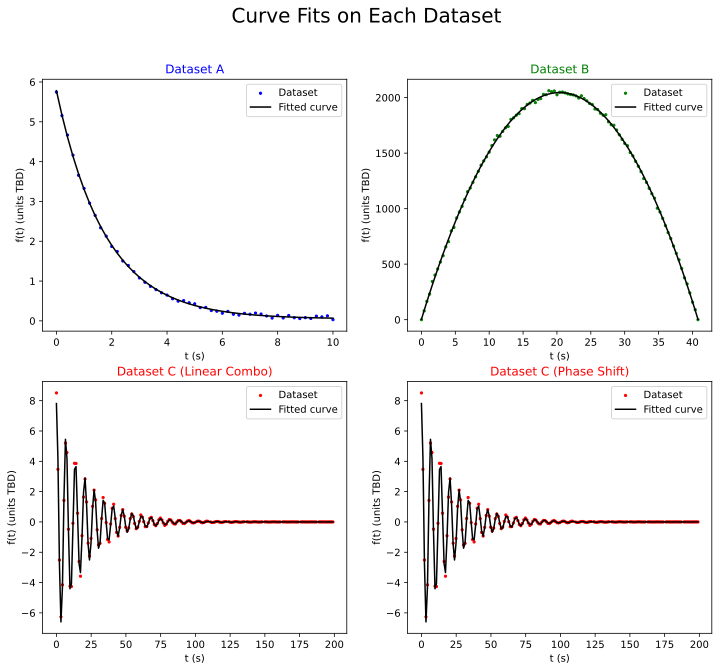

In [411]:
fig, ax = plt.subplots(2,2, figsize=(12,10))
A_color = 'blue'
B_color = 'green'
C_color = 'red'
marker_size = 5
fig.suptitle("Curve Fits on Each Dataset", fontsize = 20)

ax[0,0].scatter(A_t, A_ft, color=A_color, s = marker_size, label='Dataset')
ax[0,0].set_title("Dataset A", color=A_color)
ax[0,0].set_xlabel("t (s)")
ax[0,0].set_ylabel("f(t) (units TBD)")
ax[0,0].plot(A_t, f_A(A_t, *a_params), color='black', label='Fitted curve')
ax[0,0].legend()

ax[0,1].scatter(B_t, B_ft, color=B_color, s = marker_size, label='Dataset')
ax[0,1].set_title("Dataset B", color=B_color)
ax[0,1].set_xlabel("t (s)")
ax[0,1].set_ylabel("f(t) (units TBD)")
ax[0,1].plot(B_t, f_B(B_t, *b_params), color='black', label='Fitted curve')
ax[0,1].legend()

ax[1,0].scatter(C_t, C_ft, color=C_color, s = marker_size, label='Dataset')
ax[1,0].set_title("Dataset C (Linear Combo)", color=C_color)
ax[1,0].set_xlabel("t (s)")
ax[1,0].set_ylabel("f(t) (units TBD)")
ax[1,0].plot(C_t, f_C(C_t, *c_params), color='black', label='Fitted curve')
ax[1,0].legend()

ax[1,1].scatter(C_t, C_ft, color=C_color, s = marker_size, label='Dataset')
ax[1,1].set_title("Dataset C (Phase Shift)", color=C_color)
ax[1,1].set_xlabel("t (s)")
ax[1,1].set_ylabel("f(t) (units TBD)")
ax[1,1].plot(C_t, f_C2(C_t, *c2_params), color='black', linestyle='-', label='Fitted curve')
ax[1,1].legend()
plt.savefig("./figures/fit.png", bbox_inches='tight')
plt.show()

Those all look pretty good. Now, we can see how well these fits did by looking at the covariance matrix. Specifically, the diagonal of the covariance matrix gives the variance associated with each parameter fit. A low variance means that parameter fits very cleanly with the data. As for the off-diagonals, those give the covariance between two variables. Theoretically, the parameters should be fully independent, so those should also be very low.

### 1c. Quality of fit (variance)

In [412]:
def print_variances(cov_matrix, dataset_str):
    ''' 
    Neatly print the variances associated with each parameter.

    Parameters
    ----------
    cov_matrix : NDArray (n,n)
        Covariance matrix from curve_fit
    dataset_str : string
        Which dataset the covariance matrix is for. "A", "B", "C" or "C2"
    '''
    variances = np.diag(cov_matrix)

    print(f"\nVariances in fit parameters for {dataset_str}:")
    print(f"Parameter a: {variances[0]}")
    print(f"Parameter b: {variances[1]}")
    print(f"Parameter c: {variances[2]}")
    if len(variances) == 4:
        print(f"Parameter d: {variances[3]}")
    pass

In [413]:
print_variances(a_cov, "A")
print_variances(b_cov, "B")
print_variances(c_cov, "C (lin combo)")
print_variances(c2_cov, "C (phase shift)")


Variances in fit parameters for A:
Parameter a: 0.0003347794693215422
Parameter b: 1.414191251184345e-05
Parameter c: 5.3241205235205655e-05

Variances in fit parameters for B:
Parameter a: 8.577725871904913e-05
Parameter b: 0.15260484082628345
Parameter c: 11.902927801456533

Variances in fit parameters for C (lin combo):
Parameter a: 3.709687361237172e-07
Parameter b: 0.005576681701168933
Parameter c: 4.1224805719216504e-07
Parameter d: 0.004486789036166027

Variances in fit parameters for C (phase shift):
Parameter a: 3.7096450281302093e-07
Parameter b: 0.004471081474438774
Parameter c: 4.1224329388696766e-07
Parameter d: 9.161025143492973e-05


So, the variance for every parameter is quite quite low, aside from parameter $c$ from the model B. The thing is, the numbers in that dataset are way larger, so a variance of about 12 isn't too bad with datapoints as large as 2000.

As for the two different fits on C, the variances for the paramaters representing the same values are nearly identical (or actually identical in the case of the decay factor $a$ and the period-related factor $c$), which the variance is far greater for the paramsicient $d$ in C than it is for the phase term $d$ in C2. The more you know!

Now, onto the off-diagonals. It's too many numbers to separately print all of them so I'm just going to print the full covariance matrix for A, B, and C2 (since it has the lower numbers, and I think that's technically the ''canonical form'' of the underdamped oscillator).

In [423]:
print("A covariance:")
print(a_cov)

print("\nB covariance:")
print(b_cov)

print("\nC (phase shift) covariance:")
print(c2_cov)

A covariance:
[[ 3.34779469e-04  2.75799640e-05 -1.38796561e-05]
 [ 2.75799640e-05  1.41419125e-05  1.91937595e-05]
 [-1.38796561e-05  1.91937595e-05  5.32412052e-05]]

B covariance:
[[ 8.57772587e-05 -3.50096661e-03  2.35799100e-02]
 [-3.50096661e-03  1.52604841e-01 -1.16065011e+00]
 [ 2.35799100e-02 -1.16065011e+00  1.19029278e+01]]

C (phase shift) covariance:
[[ 3.70964503e-07  2.72802353e-05 -7.75480141e-09  2.01031205e-07]
 [ 2.72802353e-05  4.47108147e-03 -1.57720083e-06  3.38107382e-05]
 [-7.75480141e-09 -1.57720083e-06  4.12243294e-07 -4.36307195e-06]
 [ 2.01031205e-07  3.38107382e-05 -4.36307195e-06  9.16102514e-05]]


And we see that the off-diagonals are all quite small, with *possibly* a slight exception for $\Sigma^{B}_{a,c}$ (the covariance of parameters $a$ and $c$ from the fit on dataset B), which is multiple orders of magnitude greater than most other values in that matrix. Again, I would probably ascribe that to the size of the $c$ parameter.

In [431]:
def print_param_with_stddev(params, vars, name_str):
    '''
    Print a given set of parameters with the associated standard deviations.

    '''
    dict_param = {
        '0': "a",
        '1': "b",
        '2': "c",
        '3': "d"
    }
    print(f"Dataset {name_str}")
    for i in range(len(params)):
        stddev = vars[i]**0.5
        print(f"{dict_param[str(i)]} = {params[i]:0.4f} +/- {stddev:0.4f}")


print_param_with_stddev(a_params, np.diag(a_cov), "A")
print()
print_param_with_stddev(b_params, np.diag(b_cov), "B")
print()
print_param_with_stddev(c2_params, np.diag(c2_cov), "C (phase shift)")

Dataset A
a = 5.7329 +/- 0.0183
b = 0.5661 +/- 0.0038
c = 0.0485 +/- 0.0073

Dataset B
a = -4.9017 +/- 0.0093
b = 200.0621 +/- 0.3906
c = 3.9949 +/- 3.4501

Dataset C (phase shift)
a = 0.0477 +/- 0.0006
b = 7.8131 +/- 0.0669
c = 0.9227 +/- 0.0006
d = 1.5428 +/- 0.0096


# 2. Physical Interpretation

### 2a. Dataset A $\left(f_A(t) = ae^{-bt}+c\right)$

In [416]:
print_parameters(a_params, "A")


Model fit parameters for A:
Parameter a: 5.7328807910255914
Parameter b: 0.5660777117031716
Parameter c: 0.048510450878830685


A common exponential decay in physics is the number of particles in a sample in a radioactive material. A typical way to write this would be $N(t) = N_0e^{-\lambda t}$. Since our fit parameter has $c \neq 0$, it is fair for us to ignore that term and let $a = N_0$ and $b = \lambda$.

Now, it wouldn't make physical sense to start with $5.733$ particles, so I'll take the units of $N_0 = a$ to be, say "mega-particles", where $5.773 \text{ megaparticles} = 5.773 \times 10^{6} \text{ particles}$. I'll round that down to the nearest integer.

$\lambda = b$ is then the decay constant, which has physical units of inverse time.

In [417]:
N0 = int(a_params[0] * 10**6)
lambduh = a_params[1]

print("N0 =", N0, "particles")
print("lambda =", lambduh, "1/s")

N0 = 5732880 particles
lambda = 0.5660777117031716 1/s


### 2b. Dataset B $\left(f_B(t) = at^2 + bt + c\right)$

In [418]:
print_parameters(b_params, "B")


Model fit parameters for B:
Parameter a: -4.9016739868658075
Parameter b: 200.06207337108842
Parameter c: 3.9949103458311006


A common parabolic shape like this in physics would be the trajectory of a projectile $y(t) = -\frac{1}{2}gt^2 + v_0t + y_0$. So here we have $a = -\frac{1}{2}g$, with units of $\frac{\text{m}}{\text{s}^2}$, $b = v_0$ with units of $\frac{\text{m}}{\text{s}}$, and $c = y_0$ with units of $\text{m}$.

In [419]:
g = -2 * b_params[0]
v0 = b_params[1]
y0 = b_params[2]

print("g =", g, "m/s^2")
print("v0 =", v0, "m/s")
print("y0 =", y0, "m")

g = 9.803347973731615 m/s^2
v0 = 200.06207337108842 m/s
y0 = 3.9949103458311006 m


### 3c. Dataset C $\left(f_{C2}(t) = be^{-at}\sin(ct + d)\right)$

In [420]:
print_parameters(c2_params, "C")


Model fit parameters for C:
Parameter a: 0.0476959254610684
Parameter b: 7.813125535280397
Parameter c: 0.9226740548228969
Parameter d: 1.542757588126632


Plenty of things could be an underdamped oscillator. I'll go with the prototypical example of a damped mass spring. The physical meaning of the parameters takes a fair bit more work here, so I'll actually do the derivation. Say we have a mass $m$ (in kg) oscillating on a spring with spring constant $k$ (in N/m or kg/s $^2$), and damping constant $\beta$ (in kg/s or Ns/m)

\begin{align*}
    m\ddot{x} + \beta\dot{x} + kx &= 0 \\
    \ddot{x} + \frac{\beta}{m}\dot{x} + \frac{k}{m}x &= 0 \\
    \ddot{x} + 2\gamma\dot{x} + \omega_0^2x &= 0 \qquad \text{ where } \gamma = \frac{\beta}{2m} \text{ and } \omega_0 = \sqrt{\frac{k}{m}}
\end{align*}
This is underdamped when the discriminant of the characteristic equation is negative. That is, if $\gamma^2 < \omega_0^2$, and the solution involves the damped frequency $\omega_d = \sqrt{\omega_0^2 - \gamma^2}$. That solution is this:
\begin{align*}
    x(t) &= Be^{-\gamma t}\sin\left(\omega_d t + \phi\right)
\end{align*}

In [421]:
print(2*c2_params[3])

3.085515176253264


What we notice is that the coefficient out front, our $b$, is the maximum amplitude of the oscillation for $t=0$. So that would be $b = B = 7.813 \text{ m}$. The exponential decay factor is $a = \gamma = 0.048 \text{ 1/s}$, and the damped frequency is $c = \omega_d = 0.923 \text{ rad/s}$. Now, what's interesting about the phase is that it is *very* close to $\pi/2$. We see that $2d \approx 3.09$, which means $d$ itself is only a degree or 2 away from being $\pi/2$. We can use that to transform it into a $\cos$ function, since $\sin(\omega t + \pi/2) = \cos(\omega t)$. So I'll just go ahead and make that simplification, getting rid of the phase term and writing it in terms of $\cos$.

$$ x(t) = Be^{-\gamma t}\cos(\omega_d t) $$

In [422]:
B = c2_params[1]
gamma = c2_params[0]
omega_d = c2_params[2]

print("B =", B, "m")
print("gamma =", gamma, "1/s")
print("omega_d =", omega_d, "rad/s")

B = 7.813125535280397 m
gamma = 0.0476959254610684 1/s
omega_d = 0.9226740548228969 rad/s
